<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Dados-obtidos-no--Brasil-IO--" data-toc-modified-id="-Dados-obtidos-no--Brasil-IO---1"> Dados obtidos no <a href="https://data.brasil.io/dataset/covid19/_meta/list.html" target="_blank"> Brasil IO </a> </a></span></li></ul></div>

<h1>RELATÓRIO COVID-19</h1>

<h4> Dados obtidos no <a href = https://data.brasil.io/dataset/covid19/_meta/list.html> Brasil IO </a> </h4

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys 
import time
import qgrid
from datetime import datetime

In [2]:
# Data atual.
data = datetime.now()
hoje = data.strftime("%d/%m/%Y")
print(hoje)

02/09/2020


In [3]:
# Fazer o dowload do dataset e salvar no caminho especificado.

import requests

download_url = "https://data.brasil.io/dataset/covid19/caso.csv.gz"
target_csv_path = "caso.csv.gz"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download pronto.")

Download pronto.


In [4]:
# Trasformação do arquivo em dataframe.

import pandas as pd


df = pd.read_csv('caso.csv.gz', compression='gzip',error_bad_lines=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614252 entries, 0 to 614251
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            614252 non-null  object 
 1   state                           614252 non-null  object 
 2   city                            609659 non-null  object 
 3   place_type                      614252 non-null  object 
 4   confirmed                       614252 non-null  int64  
 5   deaths                          614252 non-null  int64  
 6   order_for_place                 614252 non-null  int64  
 7   is_last                         614252 non-null  bool   
 8   estimated_population_2019       611626 non-null  float64
 9   city_ibge_code                  611626 non-null  float64
 10  confirmed_per_100k_inhabitants  599526 non-null  float64
 11  death_rate                      614252 non-null  float64
dtypes: bool(1), floa

In [5]:
# Execute os seguintes comandos 

## jupyter nbextension enable --py --sys-prefix qgrid
## jupyter nbextension enable --py --sys-prefix widgetsnbextension

qgrid.show_grid(df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [6]:
df_mg = df[df['state'] == 'MG']
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78906 entries, 246895 to 325800
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            78906 non-null  object 
 1   state                           78906 non-null  object 
 2   city                            78729 non-null  object 
 3   place_type                      78906 non-null  object 
 4   confirmed                       78906 non-null  int64  
 5   deaths                          78906 non-null  int64  
 6   order_for_place                 78906 non-null  int64  
 7   is_last                         78906 non-null  bool   
 8   estimated_population_2019       78749 non-null  float64
 9   city_ibge_code                  78749 non-null  float64
 10  confirmed_per_100k_inhabitants  74915 non-null  float64
 11  death_rate                      78906 non-null  float64
dtypes: bool(1), float64(4), in

In [7]:
pd.set_option("display.max.columns",None)
df_mg_jf= df[df['city'] == 'Juiz de Fora']
df_mg_jf

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
285590,2020-09-01,MG,Juiz de Fora,city,4824,158,163,True,568873.0,3136702.0,847.99243,0.0328
285591,2020-08-31,MG,Juiz de Fora,city,4818,157,162,False,568873.0,3136702.0,846.93772,0.0326
285592,2020-08-30,MG,Juiz de Fora,city,4675,159,161,False,568873.0,3136702.0,821.80030,0.0340
285593,2020-08-29,MG,Juiz de Fora,city,4675,159,160,False,568873.0,3136702.0,821.80030,0.0340
285594,2020-08-28,MG,Juiz de Fora,city,4675,159,159,False,568873.0,3136702.0,821.80030,0.0340
...,...,...,...,...,...,...,...,...,...,...,...,...
285748,2020-03-19,MG,Juiz de Fora,city,2,0,5,False,568873.0,3136702.0,0.35157,0.0000
285749,2020-03-18,MG,Juiz de Fora,city,2,0,4,False,568873.0,3136702.0,0.35157,0.0000
285750,2020-03-17,MG,Juiz de Fora,city,2,0,3,False,568873.0,3136702.0,0.35157,0.0000
285751,2020-03-16,MG,Juiz de Fora,city,2,0,2,False,568873.0,3136702.0,0.35157,0.0000


In [8]:
# Filtros dos valores acumulados de casos confirmados e mortes: 
 
x = df_mg_jf[(df_mg_jf["is_last"] == True)]
total_confirmados = x.iloc[0].values[4]
total_mortes = x.iloc[0].values[5]
print(total_confirmados,total_mortes)

4824 158


In [9]:
df1 = df_mg_jf.sort_values(['confirmed','date'], ascending = [True,False])

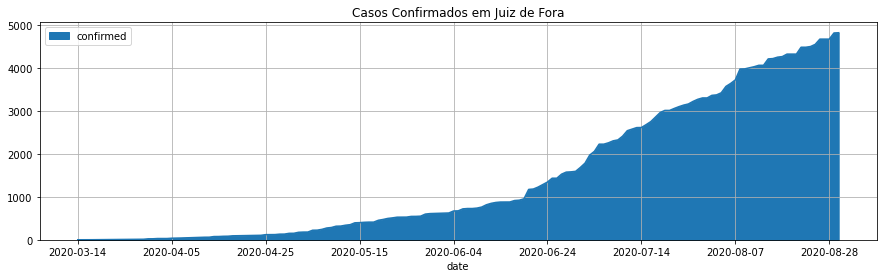

In [10]:
df1.plot(x = 'date', 
         y = 'confirmed', 
         grid=True,
         kind = 'area',
         title = 'Casos Confirmados em Juiz de Fora',
         figsize = (15,4)  
        )

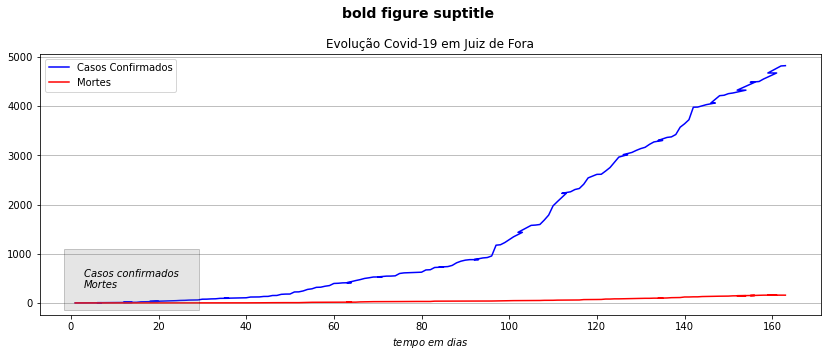

In [11]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(figsize=(14,5))
fig.subplots_adjust(top=0.85)
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax.plot(df1['order_for_place'], df1['confirmed'],'b-', label="Casos Confirmados")
ax.plot(df1['order_for_place'], df1['deaths'],'r-',label="Mortes",)
ax.legend()
ax.set(xlabel='$tempo$ $em$ $dias$',title='Evolução Covid-19 em Juiz de Fora')
plt.grid(axis='y')

ax.text(3,300, f'Casos confirmados\nMortes', style='italic',
        bbox={'facecolor': 'gray', 'alpha': 0.20, 'pad': 20})



plt.show()

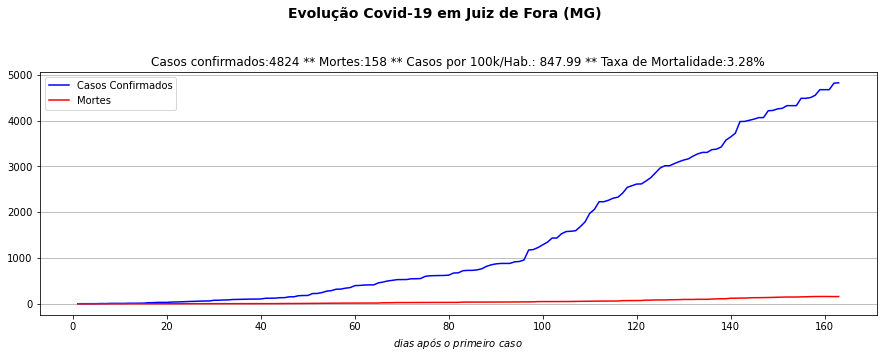

In [12]:
import matplotlib.pyplot as plt
from IPython.display import clear_output 

def main():
    
    # Mostra a lista dos códigos estaduais
    for s in df['state'].unique():
        print(s, end='/ ')
    
    # Input do estado e filtro do mesmo
    estado = str(input('\nDigite o estado conforme a lista acima: ')).upper()
    df_estado = df[df['state'] == estado]
    
    # Mostra a lista do nome das cidades
    for c in df_estado['city'].unique():
        print(c)
        
    # Input da cidade e filtro da mesma 
    cidade = input('\nDigite o nome da cidade a lista acima: ')
    df_cidade = df_estado[df_estado['city'] == cidade]
    
    # Filtro de quantidades por estado e município 
    tot_conf_est = df_estado[(df_estado["place_type"] == 'state')].iloc[0].values[4]
    tot_morte_est = df_estado[(df_estado["place_type"] == 'state')].iloc[0].values[5]
    tot_conf_cid = df_cidade[(df_cidade["is_last"] == True)].iloc[0].values[4]
    tot_mortes_cid = df_cidade[(df_cidade["is_last"] == True)].iloc[0].values[5]
    conf_per_100mil = df_cidade[(df_cidade["is_last"] == True)].iloc[0].values[10]
    tx_morte = df_cidade[(df_cidade["is_last"] == True)].iloc[0].values[11] * 100
    
    def grafico():
        
        fig, ax = plt.subplots(figsize=(15,5))
        fig.subplots_adjust(top=0.80)
        fig.suptitle(f'Evolução Covid-19 em {cidade} ({estado})',
                     fontsize=14, fontweight='bold')
        ax.plot(df_cidade['order_for_place'], df_cidade['confirmed'],'b-', label="Casos Confirmados")
        ax.plot(df_cidade['order_for_place'], df_cidade['deaths'],'r-',label="Mortes",)
        ax.legend()
        ax.set(xlabel='$dias$ $após$ $o$ $primeiro$ $caso$',
                title=f'Casos confirmados:{tot_conf_cid} ** Mortes:{tot_mortes_cid} ** Casos por 100k/Hab.: {conf_per_100mil:.2f} ** Taxa de Mortalidade:{tx_morte:.2f}%')
        plt.grid(axis='y')
        fig.savefig('evol_c19_cid.png')
        plt.show()
            
       
    # Deletar listas e perguntas do output do programa.
    clear_output()
    
    grafico()
    
if __name__ == '__main__': main()


In [13]:
t1 = time.time()

stdoutOrigin=sys.stdout 
sys.stdout = open("log_estado.txt", "w")

print(f'Data de atualização: {hoje}\n')
print('Dados Covid-19 por Estado:\n ')

for x in df.state.unique().astype(str):
    a = df[(df["state"] == x) & df['is_last'] == True].iloc[0].values[4]
    b = df[(df["state"] == x) & df['is_last'] == True].iloc[0].values[5]
    c = df[(df["state"] == x) & df['is_last'] == True].iloc[0].values[10]
    d = df[(df["state"] == x) & df['is_last'] == True].iloc[0].values[11] * 100
    print(f'''********* {x} **********
Casos Confirmados: {a:,}
Mortes: {b:,}
Casos por 100k/Hab.: {c:,.2f}
Taxa de Mortalidade: {d:.2f}%
''')

sys.stdout.close()
sys.stdout=stdoutOrigin

print('Arquivo criado com sucesso!')
t2 = time.time()
print(f'Tempo de processamento: {t2-t1:.2f}s')

Arquivo criado com sucesso!
Tempo de processamento: 10.68s


In [14]:
t1 = time.time()

stdoutOrigin=sys.stdout 
sys.stdout = open("log_cidade.txt", "w")

print(f'Data de atualização: {hoje}\n')
print('Dados Covid-19 por cidade:\n')
print(r'{casos | mortes | por 100k/Hab | tx morte (%)}')
print()

# Eliminar todas as linhas da coluna da cidade cujo valor seja Nan ou nulo.
df1 = df[(df['state'] == 'MG')].dropna(subset = ['city'])

#Loop de exibição dos valores e dados de cada cidade: 
for y in df1.city.unique():
    e = df1[(df1["city"] == y) & df1['is_last'] == True].iloc[0].values[4]
    f = df1[(df1["city"] == y) & df1['is_last'] == True].iloc[0].values[5]
    g = df1[(df1["city"] == y) & df1['is_last'] == True].iloc[0].values[10]
    h = df1[(df1["city"] == y) & df1['is_last'] == True].iloc[0].values[11] * 100
    print(f'{y}: {e:,} | {f:,} | {g:,.2f} | {h:.2f}%')

sys.stdout.close()
sys.stdout=stdoutOrigin

print('Arquivo criado com sucesso!')
t2 = time.time()
print(f'Tempo de processamento: {t2-t1:.2f}s')

Arquivo criado com sucesso!
Tempo de processamento: 46.67s


In [ ]:

def main():
      
    def downl_data():
        download_url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
        target_csv_path = "covid19_worldwise_cases.csv"

        response = requests.get(download_url)
        response.raise_for_status()    # Confere se a requisição foi realizado com sucesso.
        
        with open(target_csv_path, "wb") as f:
            f.write(response.content)

       
    df_c = pd.read_csv('covid19_worldwise_cases.csv')
    
    def log_cont():
        
        stdoutOrigin=sys.stdout 
        sys.stdout = open("log_continente.txt", "w")

        print(f'Data de atualização: {hoje}\n')
        print('Dados Covid-19 por continente:\n')
        print(r'{casos confirmados(%) | mortes(%)}')
        print()
        
        a = df_c['cases'].sum()
        b = df_c['deaths'].sum()
        
        print(f'World: {a:,} | {b:,}\n')
        
        
        for cont in df_c.continentExp.unique():
            c = df_c['cases'][df_c['continentExp'] == cont].sum()
            d = df_c['deaths'][df_c['continentExp'] == cont].sum()
            e = c / df_c['cases'].sum() * 100
            f = d / df_c['deaths'].sum() * 100    
            print(f'{cont}: {c:,} ({e:.2f}%) | {d:,} ({f:.2f}%)')

        sys.stdout.close()
        sys.stdout=stdoutOrigin
        
    def log_paises():
        
        stdoutOrigin=sys.stdout 
        sys.stdout = open("log_paises.txt", "w")
        
        print(f'Data de atualização: {hoje}\n')
        print('Dados Covid-19 por país:\n')
        print(r'{casos confirmados | mortes (% letalidade)}')
        print()
        
        for country in df_c.countriesAndTerritories.unique():
            g = df_c['cases'][df_c['countriesAndTerritories'] == country].sum()
            h = df_c['deaths'][df_c['countriesAndTerritories'] == country].sum()
            w = (h / g) * 100
            print(f'{country}: {g:,} | {h:,} ({w:.2f}%)')

        sys.stdout.close()
        sys.stdout=stdoutOrigin
        
    downl_data()
    log_cont()
    log_paises()
    
main()


In [ ]:
download_url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
target_csv_path = "covid19_worldwise_cases.csv"

response = requests.get(download_url)
response.raise_for_status()    # Confere se a requisição foi realizado com sucesso.
        
with open(target_csv_path, "wb") as f:
    f.write(response.content)

       
df_country = pd.read_csv('covid19_worldwise_cases.csv')